# Audio normalization

Audio can come in many formats, but the most common format when doing machine learning work is that we have audio in .wav files. These files contain a timeseries representing the audio, this timeseries is called the waveform. The amplitude of the timeseries represents the air pressure caused by the sound wave, you can read more about the waveform here.

Let's start by importing some dependencies

In [6]:
from pathlib import Path

import IPython.display as ipd
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

AUDIO = Path('audio')

We can load a .wav file like this

In [7]:
fname = AUDIO / 'astrid_one_bark.wav'
waveform, sample_rate = sf.read(fname)

And we can plot it like this

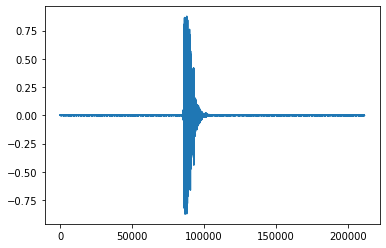

In [8]:
plt.plot(waveform)

We can also listen to the audio directly in the notebook

In [9]:
ipd.Audio(waveform, rate=sample_rate)

The absolute values of the waveform depend on a lot of things:
- Loudness of the physical recorded event.
- Distance between physical event and recording equipment.
- Processing made by someone else before you got the audio.

In other words, having a waveform with values in a certain range does not say much about the sound. It might mean that the microphone was very close to the dog, it might also mean the dog is barking really, really loud, or that someone else made the recording and gained up the waveform before you got it. When working with machine learning for audio, these are factors we would typically not like to matter, we would only like to know whether the clip contains a dog bark. Do deal with this, we can normalize the waveform by dividing by the maximum absolute value, giving the waveform a range of [-1, 1]

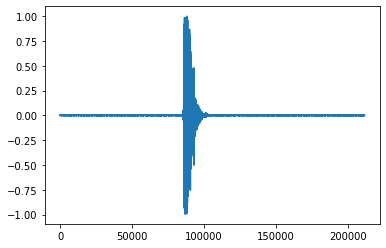

In [10]:
waveform /= np.max(np.abs(waveform))

plt.plot(waveform)

Normalizing like this also means you are not able to say anything about the loudness of the audio, but again, that is typically not something we are interested in anyways.